# **Milestone 1**

Loading the Datasets

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!ls /content/drive/MyDrive/Datasets

ProductA.csv  ProductA_fb_impressions.csv  ProductA_google_clicks.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [42]:
# Load the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_fb_impressions.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/ProductA_google_clicks.csv')


In [43]:
# Display the first 5 rows of each dataset
print("Sales Data:")
print(df1.head())

print("\nFacebook Impressions Data:")
print(df2.head())

print("\nGoogle Clicks Data:")
print(df3.head())

# Display the number of rows and columns in each dataset
print(f"\nSales Data: {df1.shape[0]} rows and {df1.shape[1]} columns")
print(f"Facebook Impressions Data: {df2.shape[0]} rows and {df2.shape[1]} columns")
print(f"Google Clicks Data: {df3.shape[0]} rows and {df3.shape[1]} columns")

Sales Data:
   Day Index  Quantity
0  12/1/2021        14
1  12/2/2021        10
2  12/3/2021        13
3  12/4/2021        22
4  12/5/2021        33

Facebook Impressions Data:
   Day Index  Impressions
0  12/1/2021          620
1  12/2/2021          890
2  12/3/2021          851
3  12/4/2021          881
4  12/5/2021          678

Google Clicks Data:
   Day Index  Clicks
0  12/1/2021     445
1  12/2/2021     433
2  12/3/2021     424
3  12/4/2021     427
4  12/5/2021     451

Sales Data: 212 rows and 2 columns
Facebook Impressions Data: 212 rows and 2 columns
Google Clicks Data: 212 rows and 2 columns


Merging Datasets

In [44]:
# merging datasets
merged_df = df1.merge(df2,how="left", on='Day Index').merge(df3,how='left', on='Day Index')

cleaned_df = merged_df.dropna()

cleaned_df.to_csv('merged_file.csv', index=False)

print(cleaned_df)

     Day Index  Quantity  Impressions  Clicks
0    12/1/2021        14          620     445
1    12/2/2021        10          890     433
2    12/3/2021        13          851     424
3    12/4/2021        22          881     427
4    12/5/2021        33          678     451
..         ...       ...          ...     ...
207  6/26/2022        13         1218     114
208  6/27/2022        16         1311     106
209  6/28/2022        13          885     109
210  6/29/2022        16         1000      60
211  6/30/2022         8          875      65

[212 rows x 4 columns]


Time wise graph ploting for Quantity

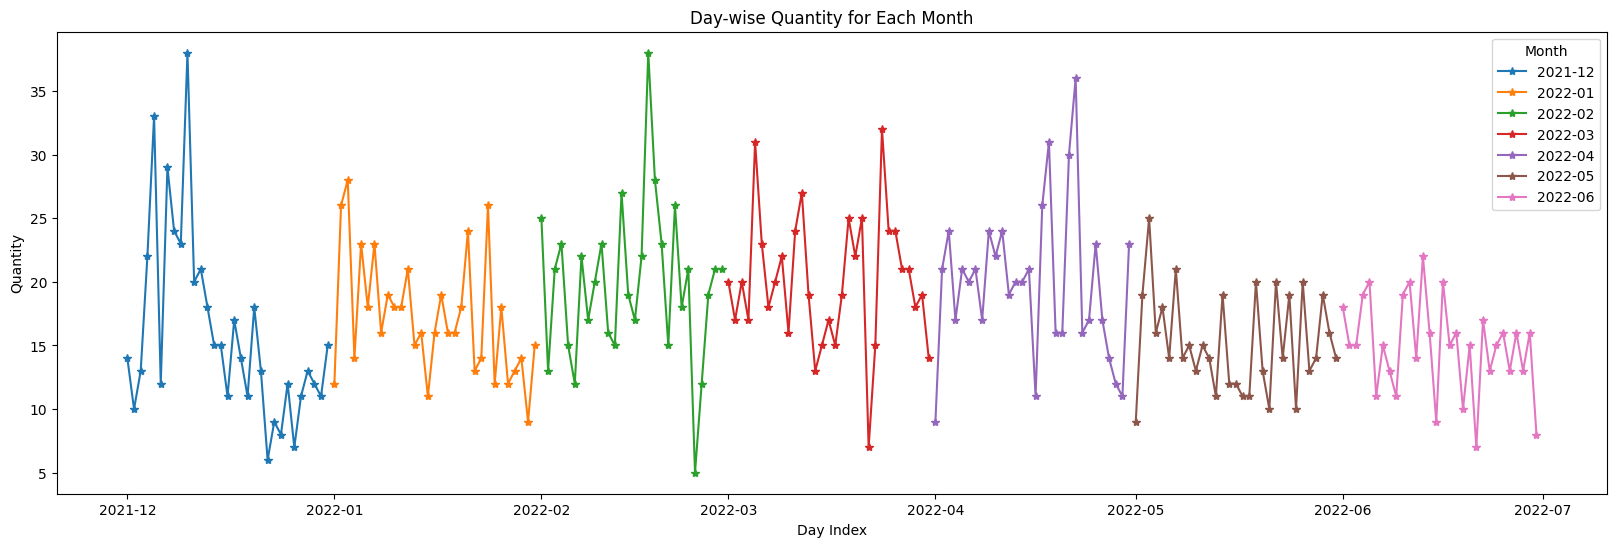

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('merged_file.csv')

data['Day Index'] = pd.to_datetime(data['Day Index'])
data['YearMonth'] = data['Day Index'].dt.to_period('M')

plt.figure(figsize=(20, 6))
for month in data['YearMonth'].unique():
    monthly_data = data[data['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='*', linestyle='-', label=str(month))
plt.title('Day-wise Quantity for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.legend(title='Month', loc='best')
plt.show()

Time wise graph ploting for Impressions

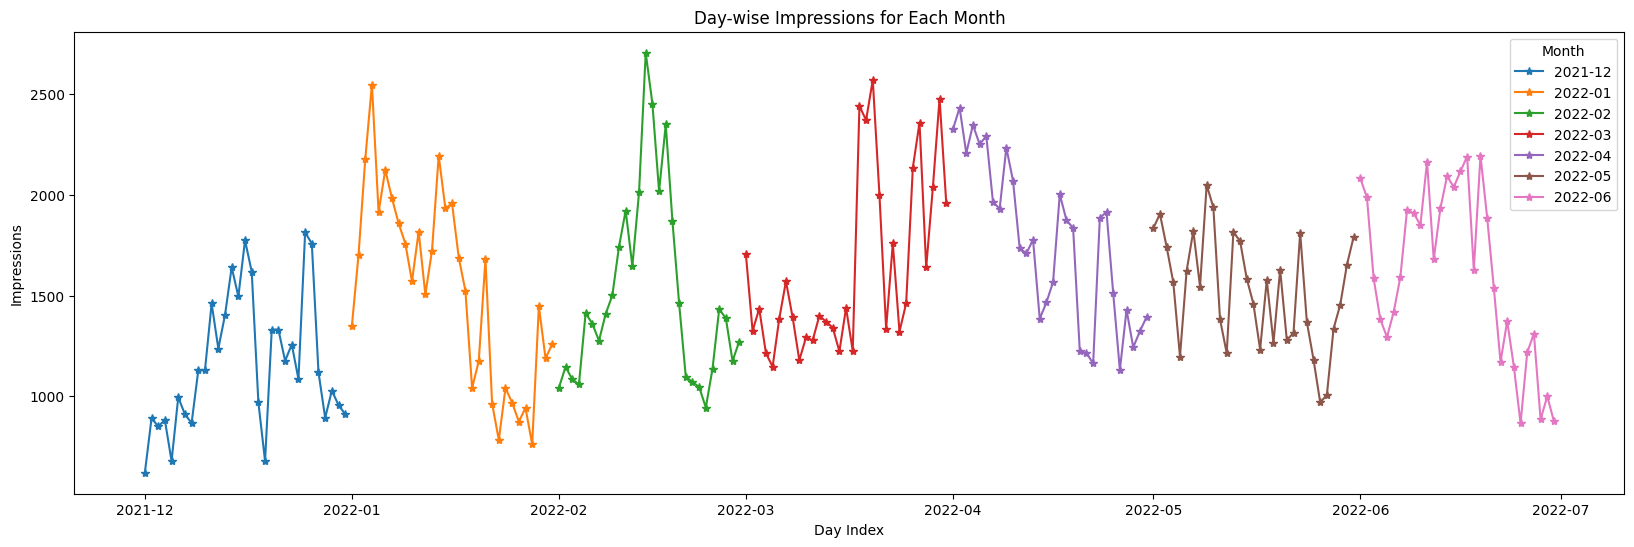

In [46]:
# Ploting of Day-wise Impressions for Each Month
plt.figure(figsize=(20, 6))
for month in data['YearMonth'].unique():
    monthly_data = data[data['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='*', linestyle='-', label=str(month))
plt.title('Day-wise Impressions for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.legend(title='Month', loc='best')
plt.show()

Time wise graph ploting for Clicks

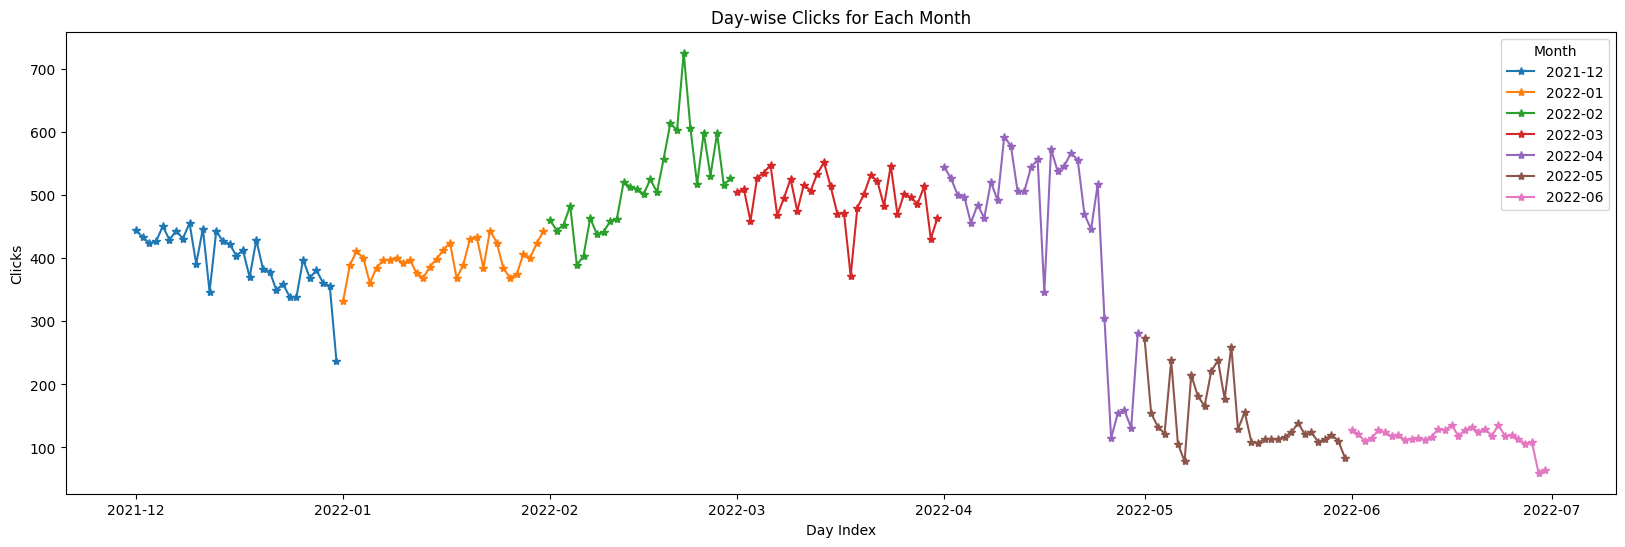

In [47]:

# Ploting of Day-wise Clicks for Each Month
plt.figure(figsize=(20, 6))
for month in data['YearMonth'].unique():
    monthly_data = data[data['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='*', linestyle='-', label=str(month))
plt.title('Day-wise Clicks for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.legend(title='Month', loc='best')
plt.show()

## **EDA** ( Exploratory Data Analysis)

Display Missing Values

In [48]:
import pandas as pd

# Load the uploaded CSV file

data = pd.read_csv('merged_file.csv')

# Find missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


Boxplot for outliers

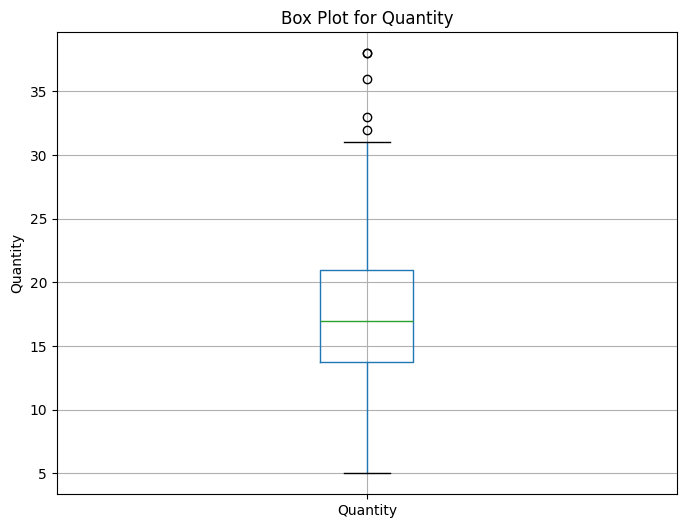

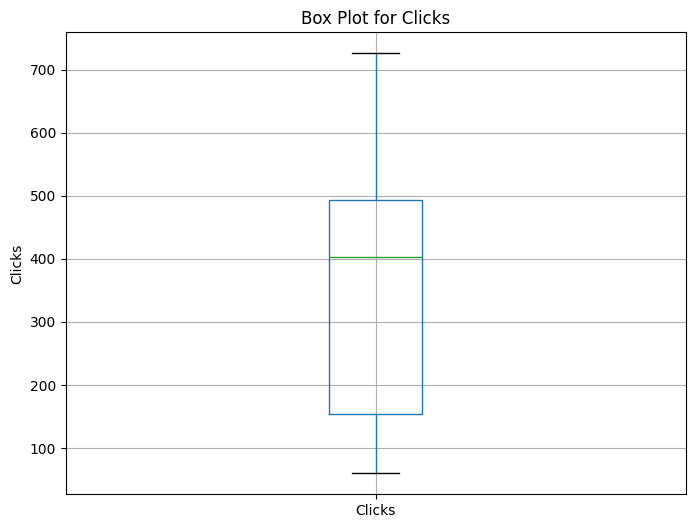

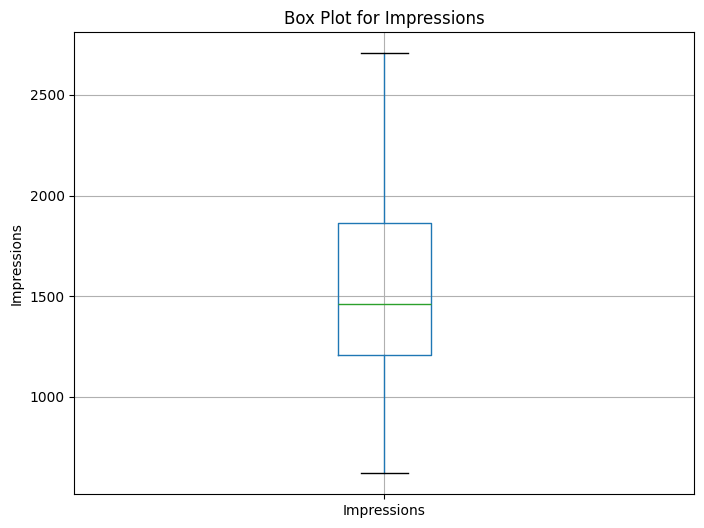

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Box plot for Quantity
plt.figure(figsize=(8, 6))
data.boxplot(column='Quantity')
plt.title('Box Plot for Quantity')
plt.ylabel('Quantity')
plt.show()

# Box plot for Clicks
plt.figure(figsize=(8, 6))
data.boxplot(column='Clicks')
plt.title('Box Plot for Clicks')
plt.ylabel('Clicks')
plt.show()

# Box plot for Impressions
plt.figure(figsize=(8, 6))
data.boxplot(column='Impressions')
plt.title('Box Plot for Impressions')
plt.ylabel('Impressions')
plt.show()


By the Interquartile Range (IQR) method, find outliers below the 25th percentile and above the 75th percentile.

In [ ]:
import pandas as pd

def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    outliers = column[(column < (q1 - 1.5 * IQR)) | (column > (q3 + 1.5 * IQR))]
    return outliers

# Print the number of outliers for each column
print(f"Quantity:\t {len(find_outliers_IQR(data['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(data['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(data['Impressions']))}")


Quantity:	 5
Clicks:		 0
Impressions:	 0


There are 5 outlier in Quantity

In [50]:
print(f"Quantity:\n{find_outliers_IQR(data['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


**Replacing Outliers with 98th percentile**

print the 98 percentile value

In [51]:
percentile_98_value = data["Quantity"].quantile(0.98)
print(percentile_98_value)

31.78


In [52]:
def calculate_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_95_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_98_value if x < lower_bound or x > upper_bound else x)

In [53]:
data['updated_Quantity'] = calculate_outliers_98th_percentile(data['Quantity'])
data['updated_Quantity'] = data['updated_Quantity'].astype(int)

Printing the merge data set after updated outliers

In [54]:
data.head()

,Day Index,Quantity,Impressions,Clicks,updated_Quantity
0,12/1/2021,14,620,445,14
1,12/2/2021,10,890,433,10
2,12/3/2021,13,851,424,13
3,12/4/2021,22,881,427,22
4,12/5/2021,33,678,451,31


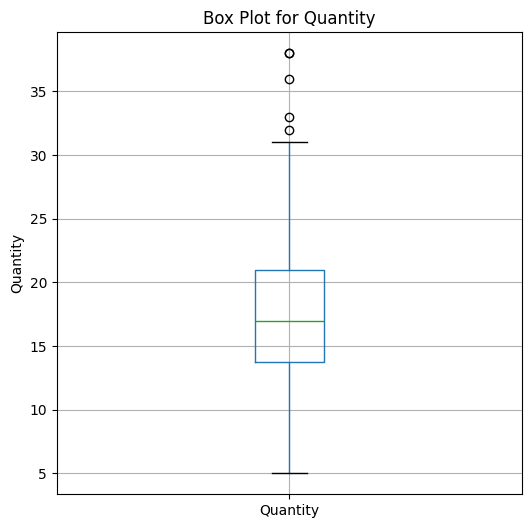

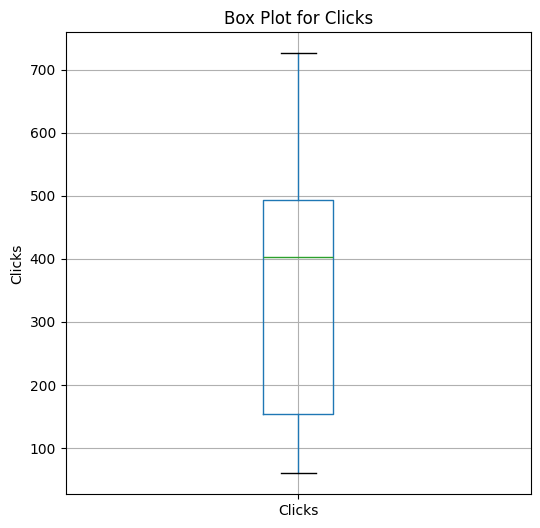

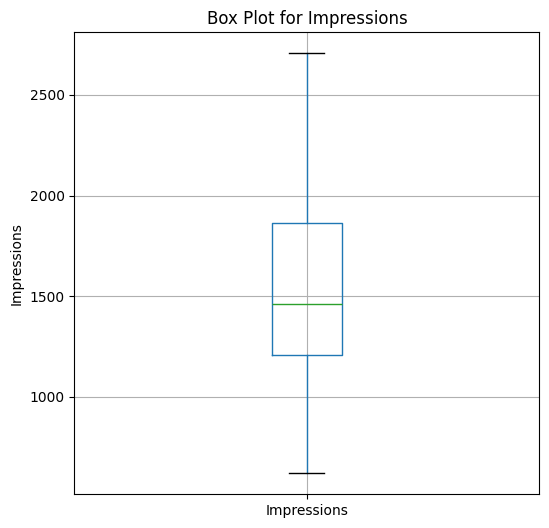

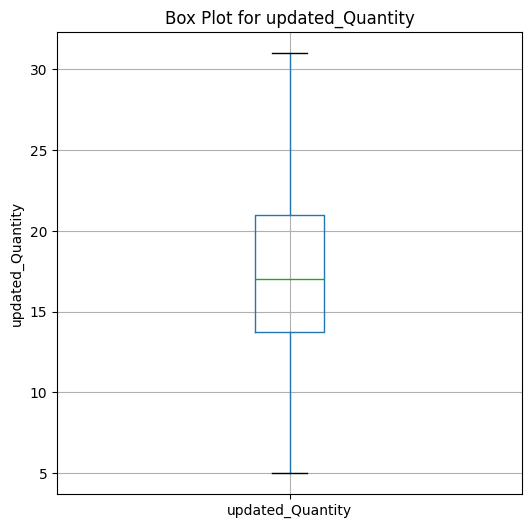

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Box plot for Quantity
plt.figure(figsize=(6, 6))
data.boxplot(column='Quantity')
plt.title('Box Plot for Quantity')
plt.ylabel('Quantity')
plt.show()

# Box plot for Clicks
plt.figure(figsize=(6, 6))
data.boxplot(column='Clicks')
plt.title('Box Plot for Clicks')
plt.ylabel('Clicks')
plt.show()

# Box plot for Impressions
plt.figure(figsize=(6, 6))
data.boxplot(column='Impressions')
plt.title('Box Plot for Impressions')
plt.ylabel('Impressions')
plt.show()

# Box plot for updated quantity
plt.figure(figsize=(6, 6))
data.boxplot(column='updated_Quantity')
plt.title('Box Plot for updated_Quantity')
plt.ylabel('updated_Quantity')
plt.show()

The above boxplot shows that updated_quantity doesn't contain any values with outliers.

## **Feature Engineering**

In [65]:
import pandas as pd
import holidays

# Ensure 'Day Index' is in datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'], errors='coerce')

# Day of the month
data['Day of the Month'] = data['Day Index'].dt.day

# Extracting month and day of the week
data['month'] = data['Day Index'].dt.month_name()
data['day_of_week'] = data['Day Index'].dt.day_name()

data['YearMonth'] = data['Day Index'].dt.to_period('M')

# Creating binary columns for months
months = data['month'].unique()
for month in months:
    data[month] = (data['month'] == month).astype(int)

# Creating binary columns for days of the week
days_of_week = data['day_of_week'].unique()
for day in days_of_week:
    data[day] = (data['day_of_week'] == day).astype(int)

# Weekend feature
data['Is_Weekend'] = data['Day Index'].dt.dayofweek.isin([5, 6]).astype(int)

# Weekdays
data['Is_Weekday'] = 1 - data['Is_Weekend']

# Holiday feature
us_holidays = holidays.US()
data['Is_Holiday'] = data['Day Index'].apply(lambda x: 1 if x in us_holidays else 0)

print(data.head())


   Day Index  Quantity  Impressions  Clicks  updated_Quantity  \
0 2021-12-01        14          620     445                14   
1 2021-12-02        10          890     433                10   
2 2021-12-03        13          851     424                13   
3 2021-12-04        22          881     427                22   
4 2021-12-05        33          678     451                31   

   Day of the Month     month day_of_week  December  January  ...  Thursday  \
0                 1  December   Wednesday         1        0  ...         0   
1                 2  December    Thursday         1        0  ...         1   
2                 3  December      Friday         1        0  ...         0   
3                 4  December    Saturday         1        0  ...         0   
4                 5  December      Sunday         1        0  ...         0   

   Friday  Saturday  Sunday  Monday  Tuesday  Is_Weekend  Is_Weekday  \
0       0         0       0       0        0           0      

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Day Index         212 non-null    datetime64[ns]
 1   Quantity          212 non-null    int64         
 2   Impressions       212 non-null    int64         
 3   Clicks            212 non-null    int64         
 4   updated_Quantity  212 non-null    int64         
 5   Day of the Month  212 non-null    int32         
 6   month             212 non-null    object        
 7   day_of_week       212 non-null    object        
 8   December          212 non-null    int64         
 9   January           212 non-null    int64         
 10  February          212 non-null    int64         
 11  March             212 non-null    int64         
 12  April             212 non-null    int64         
 13  May               212 non-null    int64         
 14  June              212 non-

In [67]:
data.to_excel('final_masterdata.xlsx', index=False)

In [68]:
df=pd.read_excel('final_masterdata.xlsx')

### **Visualization **

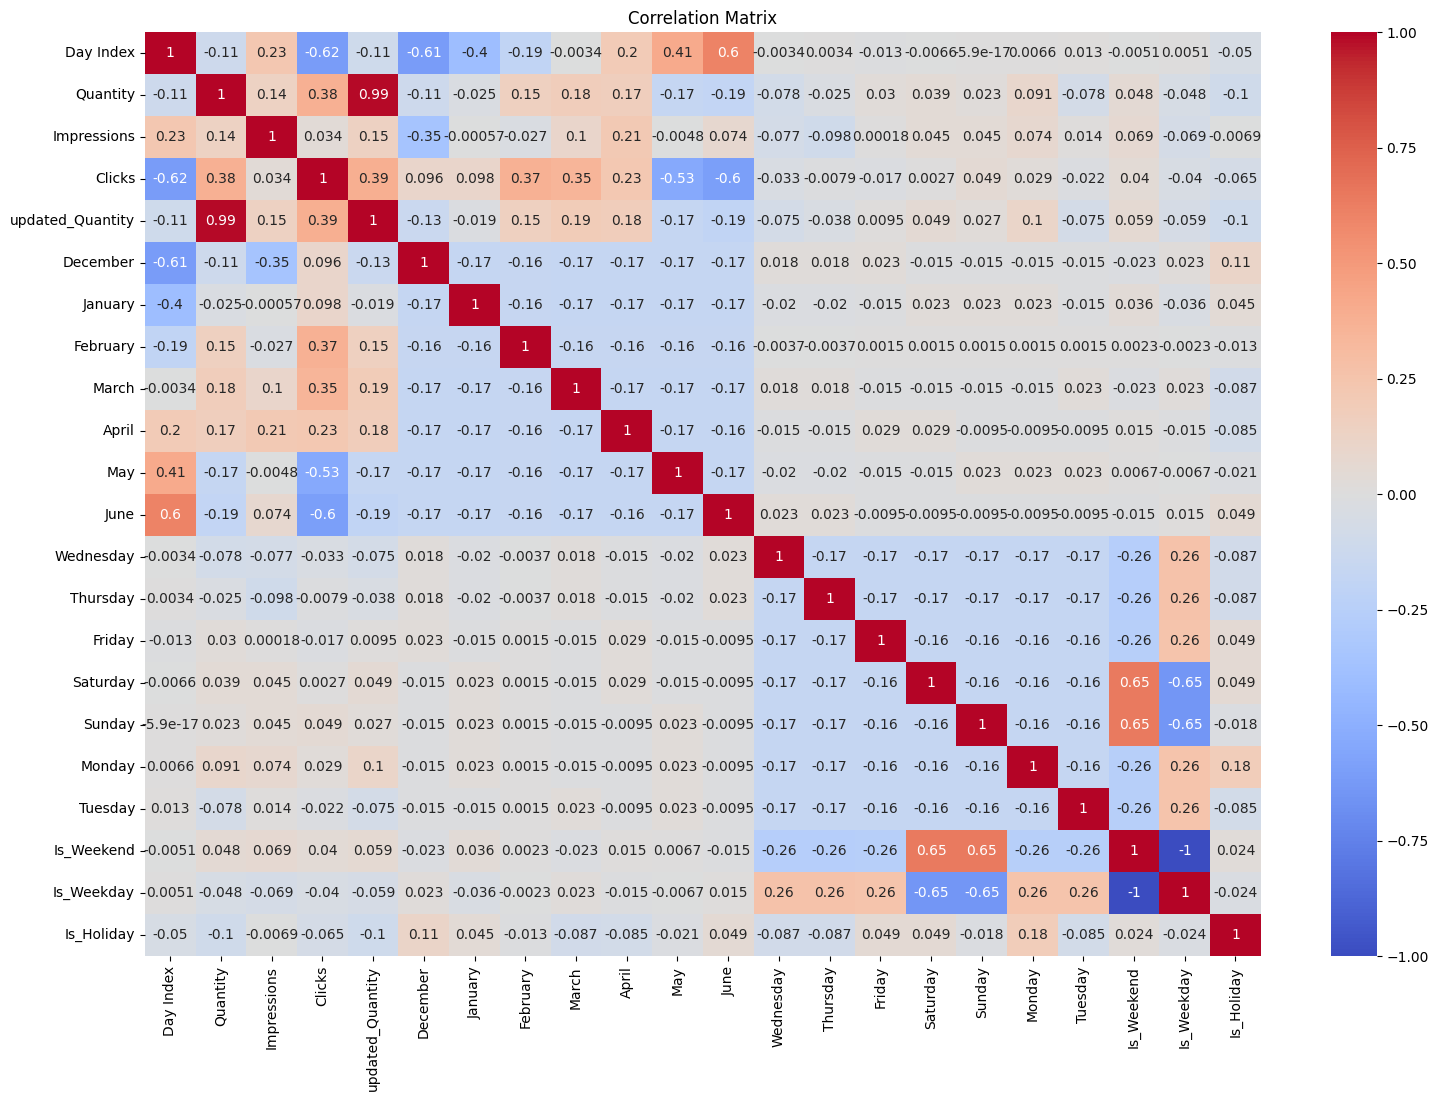

In [75]:
import seaborn as sns
df_filtered = df.drop(columns=['YearMonth', 'Day of the Month', 'day_of_week','month'])

df_encoded = pd.get_dummies(df_filtered, drop_first=True)

plt.figure(figsize=(18,12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Final Master Data Plot**

Day wise plot

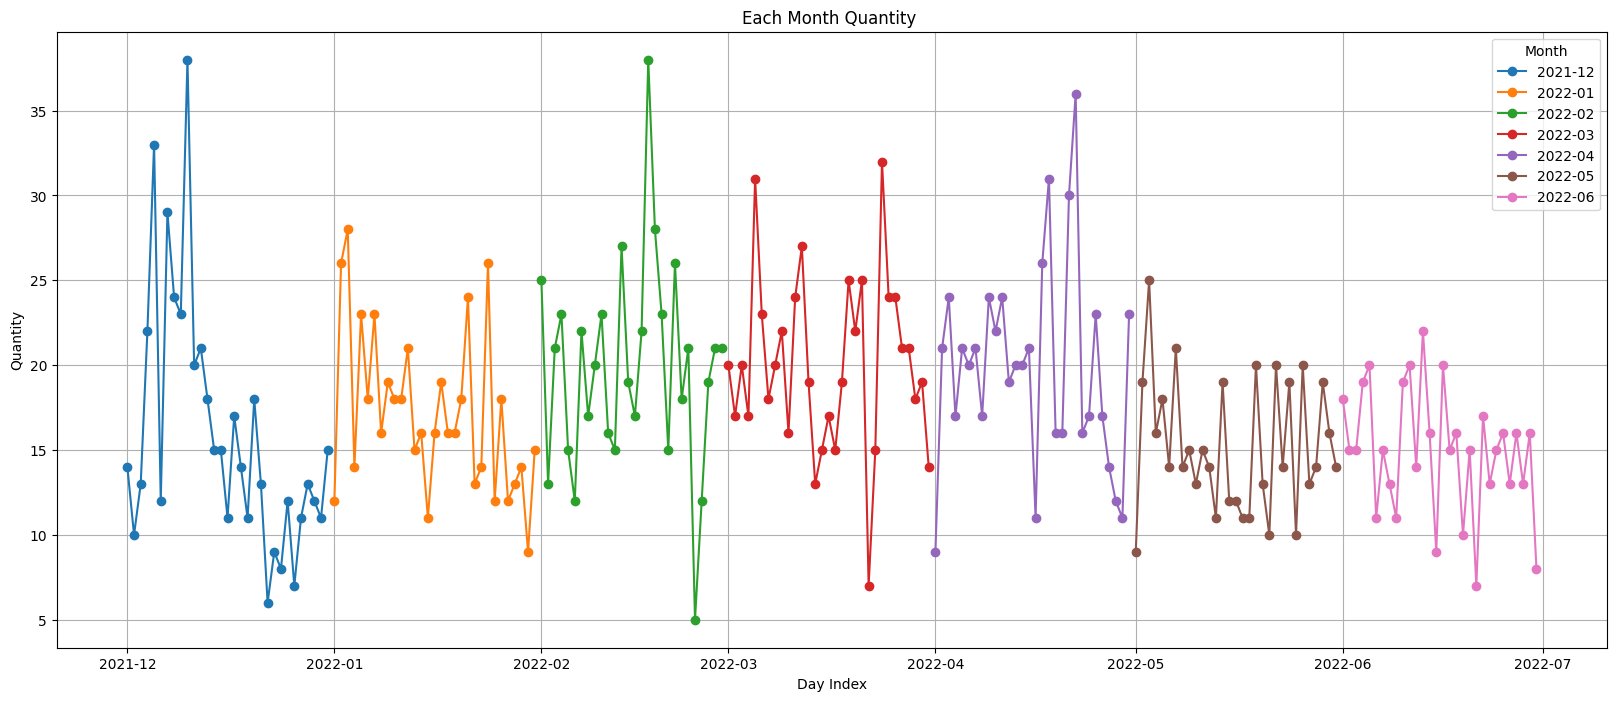

In [77]:
plt.figure(figsize=(20, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month Quantity ')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

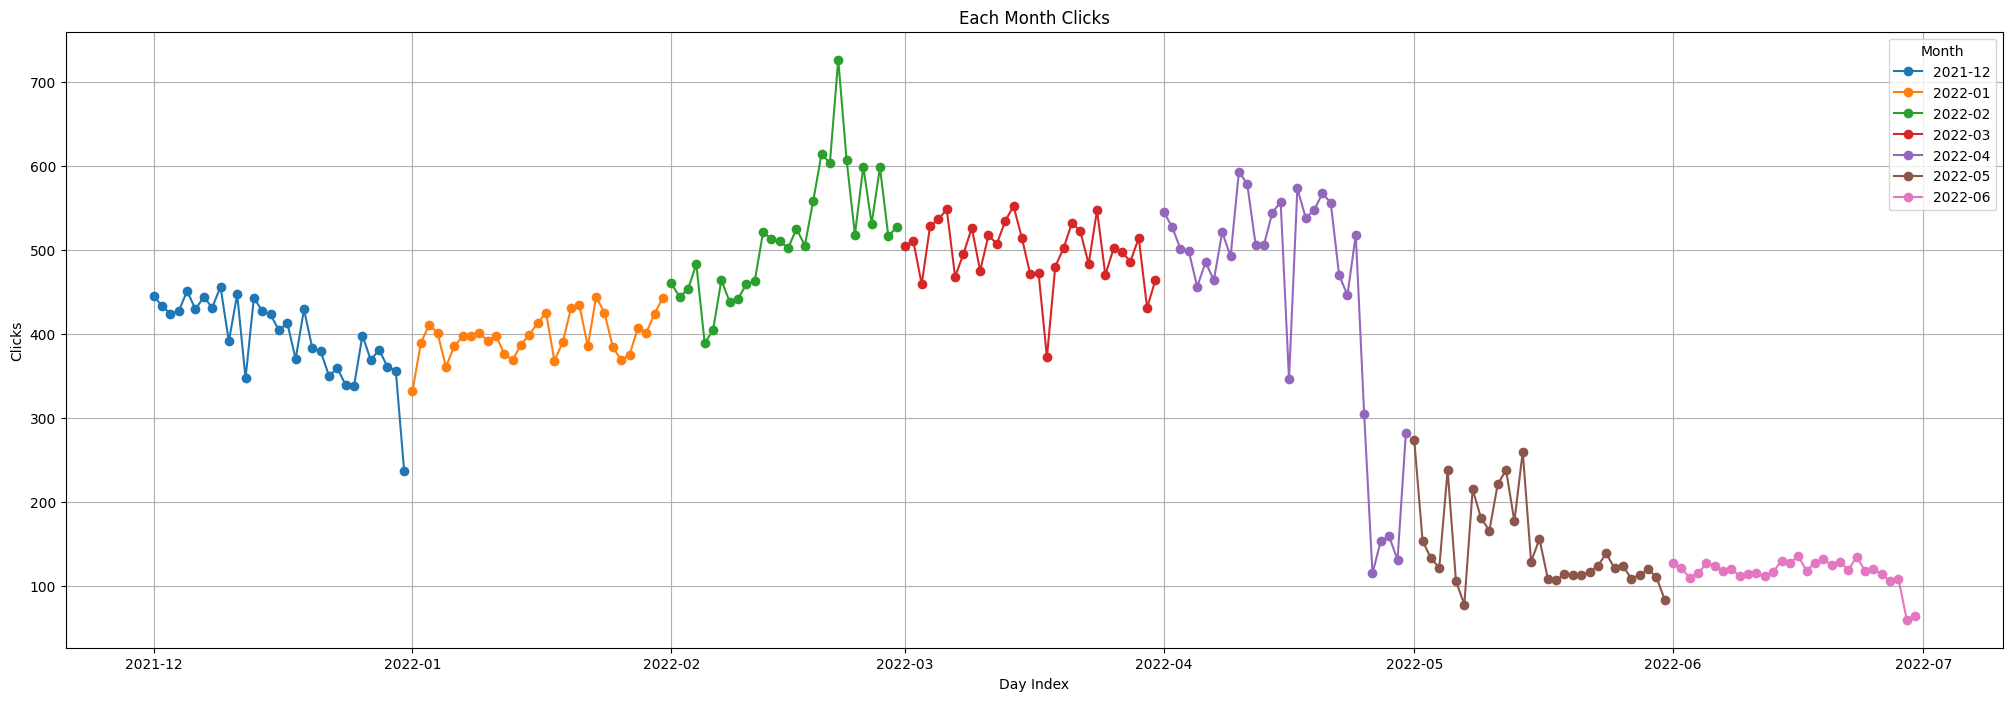

In [78]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='o', linestyle='-', label=str(month))

plt.title('Each Month Clicks')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

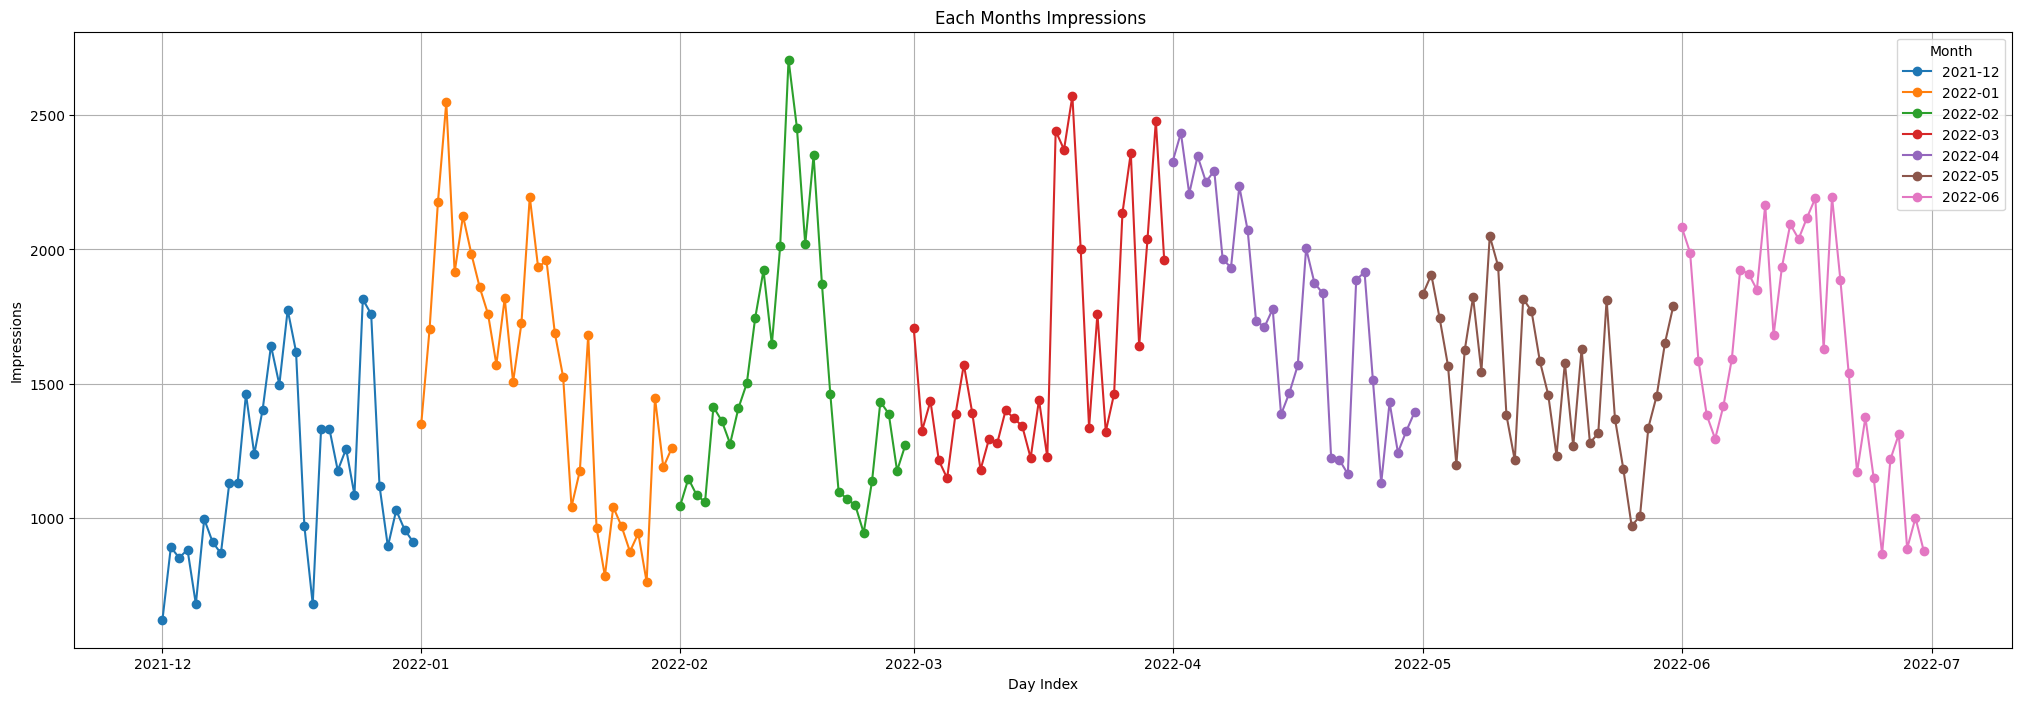

In [79]:
plt.figure(figsize=(25, 8))

for month in df['YearMonth'].unique():
    monthly_data = df[df['YearMonth'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-', label=str(month))

plt.title('Each Months Impressions ')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.legend(title='Month', loc='best')
plt.grid(True)

plt.show()

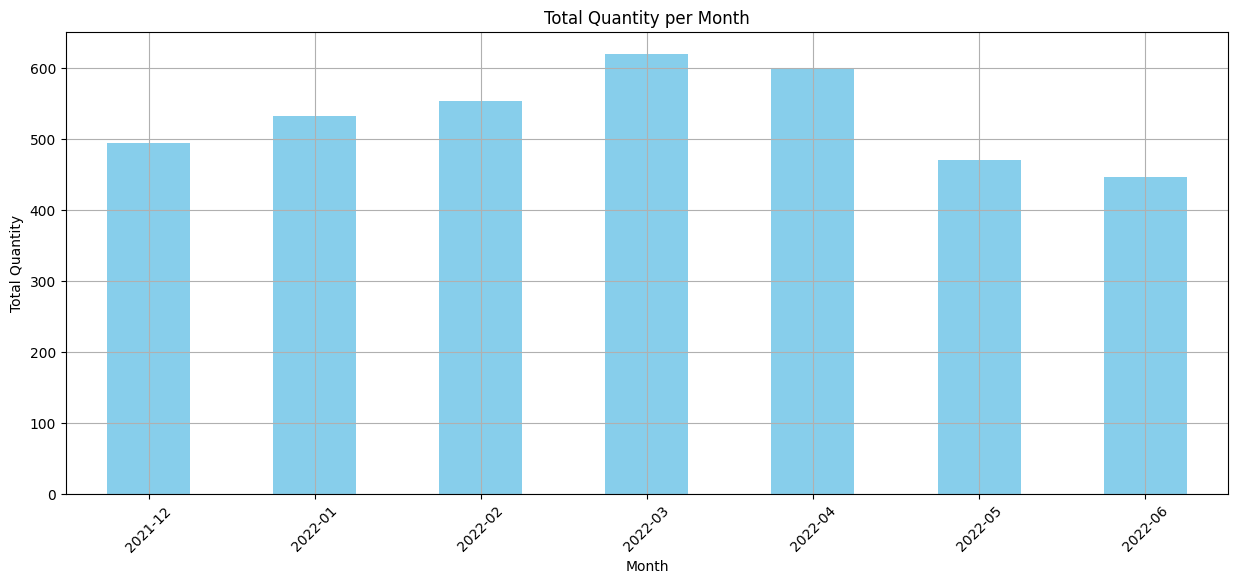

In [81]:
monthly_quantity = df.groupby('YearMonth')['Quantity'].sum()

# Plot the monthly total quantity
plt.figure(figsize=(15, 6))
monthly_quantity.plot(kind='bar', color='skyblue')

plt.title('Total Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


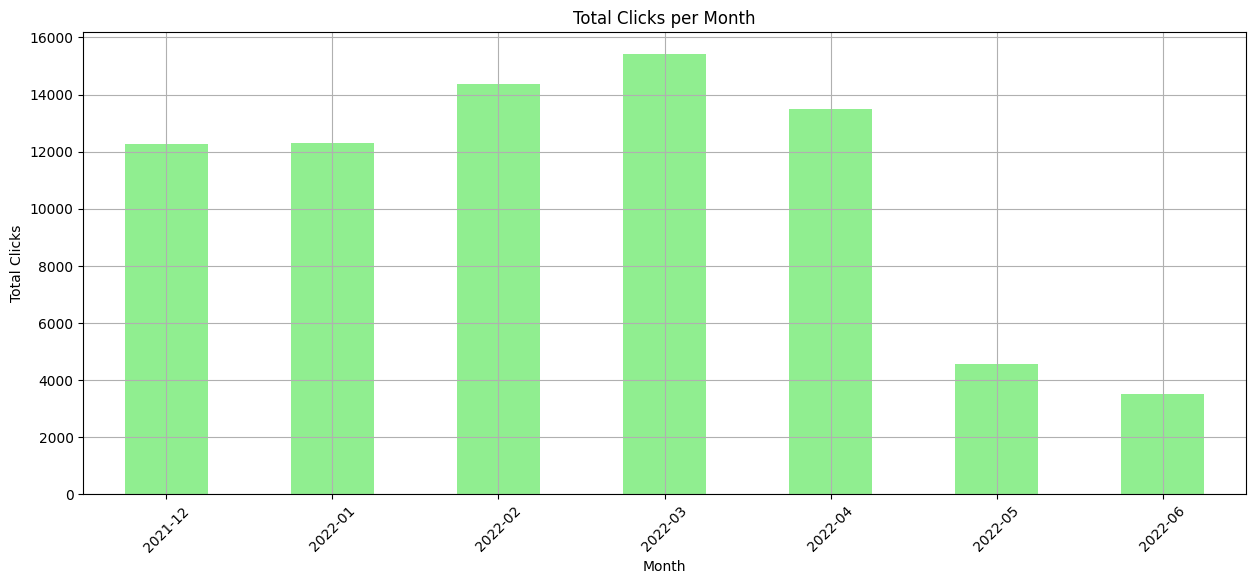

In [82]:
monthly_clicks = df.groupby('YearMonth')['Clicks'].sum()

# Plot the monthly total clicks
plt.figure(figsize=(15, 6))
monthly_clicks.plot(kind='bar', color='lightgreen')

plt.title('Total Clicks per Month')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


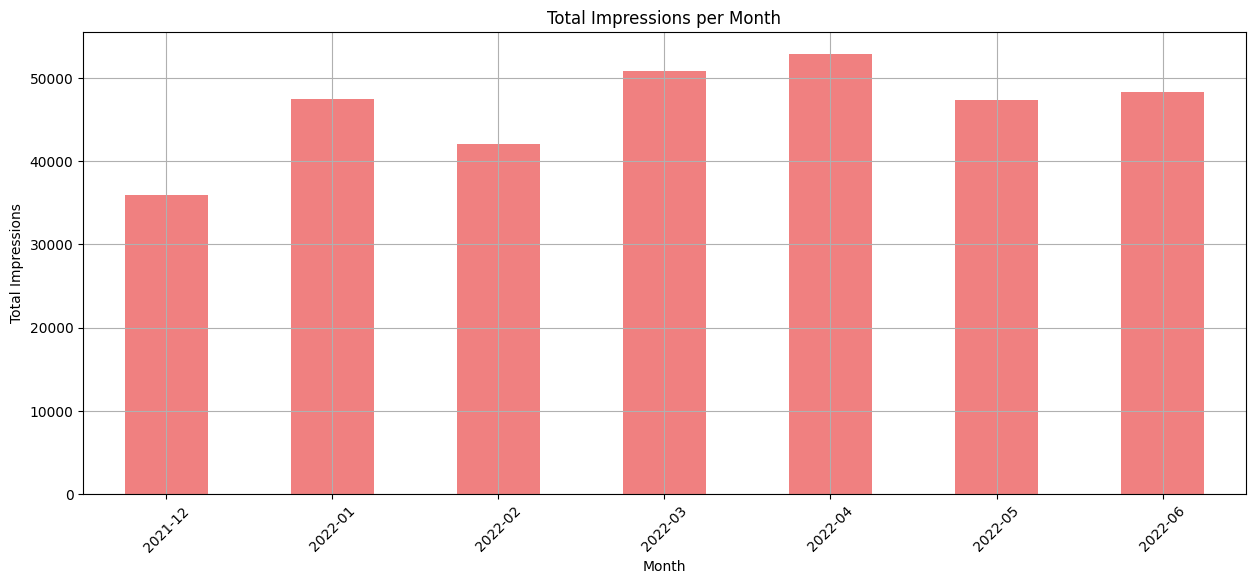

In [83]:
monthly_impressions = df.groupby('YearMonth')['Impressions'].sum()

# Plot the monthly total impressions
plt.figure(figsize=(15, 6))
monthly_impressions.plot(kind='bar', color='lightcoral')

plt.title('Total Impressions per Month')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


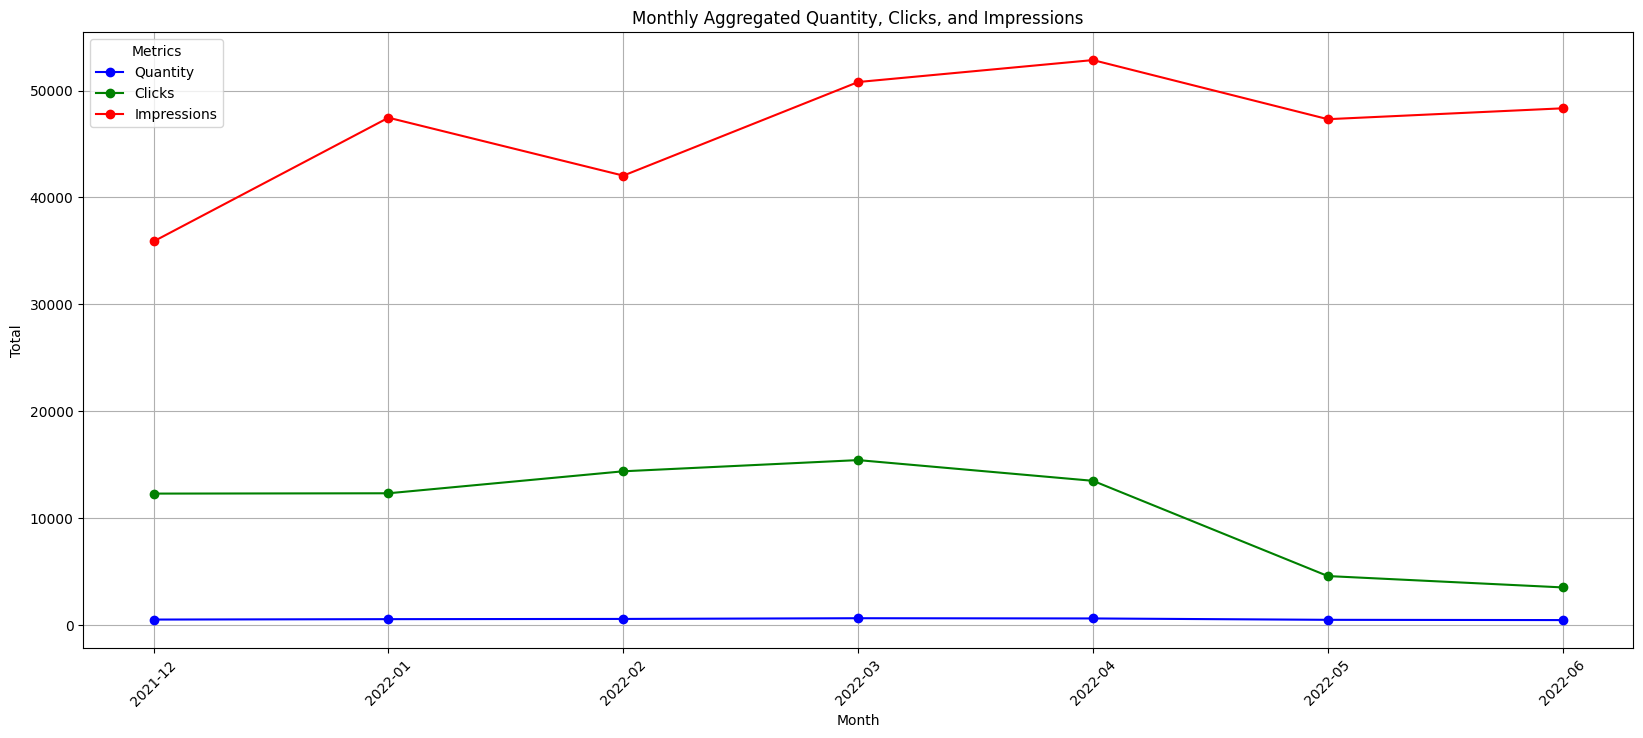

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

monthly_data = df.groupby('YearMonth')[['Quantity', 'Clicks', 'Impressions']].sum()

# Create a merged line plot for Quantity, Clicks, and Impressions
plt.figure(figsize=(20, 8))

plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', color='blue', label='Quantity')
plt.plot(monthly_data.index, monthly_data['Clicks'], marker='o', color='green', label='Clicks')
plt.plot(monthly_data.index, monthly_data['Impressions'], marker='o', color='red', label='Impressions')

plt.title('Monthly Aggregated Quantity, Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='best')
plt.grid(True)

plt.show()


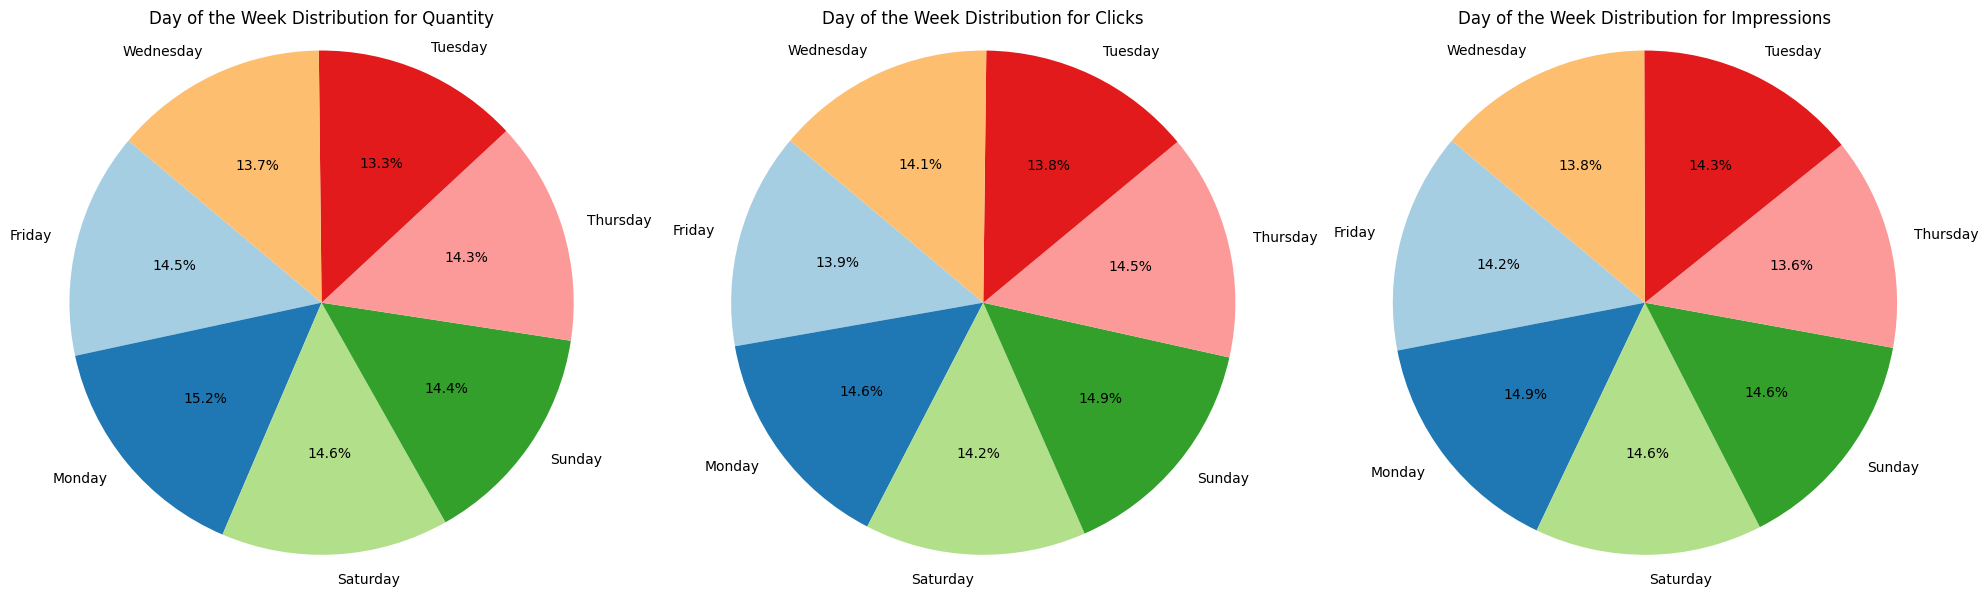

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

df['DayOfWeek'] = df['Day Index'].apply(lambda x: pd.to_datetime(x).strftime('%A'))

# Function to plot pie chart for Day of the Week distribution
def plot_daywise_pie(df, x_col, y_col, title, ax):
    df1 = df.groupby(x_col)[y_col].sum().reset_index()

    sizes = df1[y_col]
    labels = df1[x_col]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(title)
    ax.axis('equal')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pie chart for Quantity
plot_daywise_pie(df, 'DayOfWeek', 'Quantity', 'Day of the Week Distribution for Quantity', axes[0])

# Pie chart for Clicks
plot_daywise_pie(df, 'DayOfWeek', 'Clicks', 'Day of the Week Distribution for Clicks', axes[1])

# Pie chart for Impressions
plot_daywise_pie(df, 'DayOfWeek', 'Impressions', 'Day of the Week Distribution for Impressions', axes[2])

plt.tight_layout()
plt.show()
